## BT4211 Group 9 Hotel Project 

### Clean the data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('HotelCustomersDataset_Cleaned.csv')
df.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,...,0,0,0,0,0,1,0,0,0,0
1,2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,...,0,0,1,0,0,0,0,0,0,1
3,4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,...,0,0,1,0,0,0,0,0,1,0


In [19]:
df.shape

(75397, 49)

In [20]:
df.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
count,75397.000000,75397.000000,75397.00000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,...,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000
mean,41458.629853,41459.629853,47.43962,457.372482,69.406104,311.787922,70.174372,0.001950,0.000610,0.826638,...,0.136146,0.006525,0.826863,0.002958,0.005093,0.025147,0.131491,0.116583,0.573869,0.144860
std,23946.219003,23946.219003,14.63154,310.607758,88.717833,365.144705,112.928400,0.067813,0.029129,0.688431,...,0.342946,0.080517,0.378368,0.054304,0.071184,0.156572,0.337938,0.320925,0.494517,0.351962
min,0.000000,1.000000,18.00000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20943.000000,20944.000000,36.00000,184.000000,1.000000,91.200000,7.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40780.000000,40781.000000,48.00000,414.000000,34.000000,246.900000,42.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61799.000000,61800.000000,58.00000,722.000000,108.000000,415.000000,91.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,83588.000000,83589.000000,122.00000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Create RFM_df
RFM_df = df.assign(
    Recency=df['DaysSinceLastStay'], 
    Frequency=df['BookingsCheckedIn'], 
    Monetary=df['LodgingRevenue'] + df['OtherRevenue'])
RFM_df = RFM_df[['ID','Recency', 'Frequency', 'Monetary']]
RFM_df.head()

,ID,Recency,Frequency,Monetary
0,1,151,3,476.3
1,3,-1,0,0.0
2,4,1100,1,300.0
3,5,-1,0,0.0
4,6,1097,1,254.0


#### Investigate customers with `Monetary` = 0

In [22]:
# confirm whether customers with Monetary = 0 means they had never stayed at the hotel before
RFM_df[RFM_df['Monetary']==0]['Frequency'].value_counts()

0    15611
1      177
2        9
4        2
7        2
3        2
Name: Frequency, dtype: int64

In [23]:
RFM_df[RFM_df['Recency']==-1].shape

(15611, 4)

In [24]:
df['TotalRevenue'] = df['LodgingRevenue'] + df['OtherRevenue']
df[(df['TotalRevenue']==0) & (df['DaysSinceFirstStay']!=-1)][['MarketSegment_Complementary','MarketSegment_Groups','MarketSegment_Direct','MarketSegment_Travel Agent/Operator']].sum()

MarketSegment_Complementary            166
MarketSegment_Groups                    12
MarketSegment_Direct                     8
MarketSegment_Travel Agent/Operator      6
dtype: int64

- Confirmed that majority, but not all customers with `Monetary` = 0 means they never stayed at the hotel before.
- 15,611 customers were found to have `Monetary` = 0 as they never stayed at the hotel before since their `Recency` = -1 and `Frequency` = 0.
- Remaining 192 customers with `Monetary` = 0 have stayed at the hotel at least once. 
- Majority of these 192 customers belong to the 'Complementary' MarketSegment, which probably explains why they did not pay for the hotel stay. Other segments include 'Groups', 'Direct', and 'Travel Agent/Operator'.
- Since they are only 192 such customers (vvv small proportion), can just drop them and focus on higher valued customers.

In [25]:
# Only keep clients that had make a check-in in the past and is considered a client
print(f'There were {len(RFM_df)} customers at first.\n')

RFM_df = RFM_df[
    (RFM_df['Recency'] > 0) & 
    (RFM_df['Frequency'] != 0)  
   & (RFM_df['Monetary'] != 0)
    ]

print(f'After dropping customers who have not stayed at the hotel and/or have no monetary value, there are {len(RFM_df)} customers.\n')

print(RFM_df.head())

There were 75397 customers at first.

After dropping customers who have not stayed at the hotel and/or have no monetary value, there are 59593 customers.

   ID  Recency  Frequency  Monetary
0   1      151          3     476.3
2   4     1100          1     300.0
4   6     1097          1     254.0
6   8     1100          1     629.0
8  10     1098          1     243.0


In [26]:
RFM_df.describe()

,ID,Recency,Frequency,Monetary
count,59593.000000,59593.000000,59593.000000,59593.000000
mean,36561.772440,519.054939,1.042085,483.253420
std,22841.005167,301.082006,0.610004,436.730538
min,1.000000,1.000000,1.000000,1.000000
25%,17735.000000,248.000000,1.000000,242.000000
50%,33472.000000,520.000000,1.000000,381.300000
75%,53873.000000,788.000000,1.000000,579.500000
max,83589.000000,1104.000000,66.000000,11930.660000


### Check distribution of data

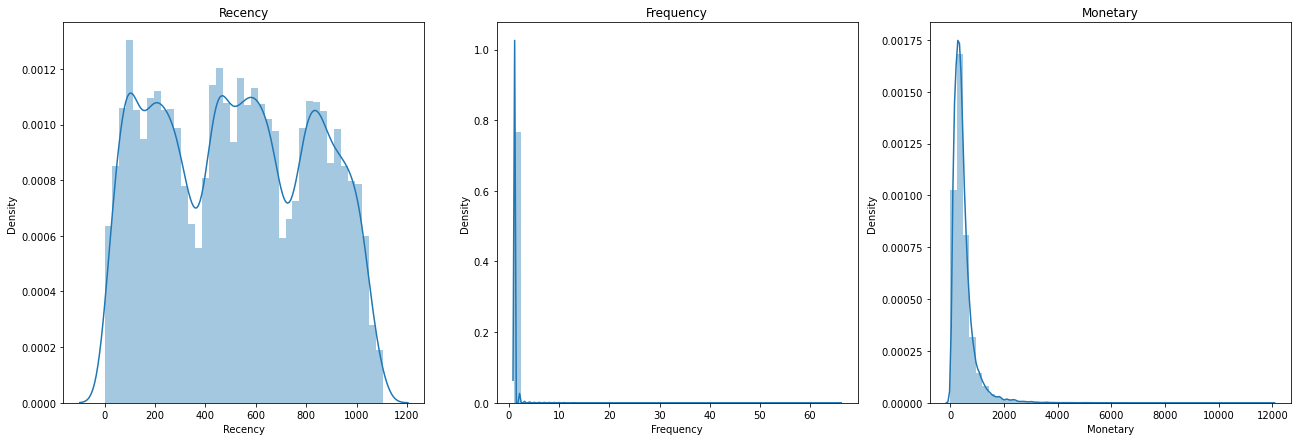

In [27]:
columns=["Recency","Frequency","Monetary"]
plt.figure(figsize=(22,7))
for i,j in enumerate(columns):
    plt.subplot(1,3,i+1)
    sns.distplot(RFM_df[j])
    plt.title('{}'.format(j))

#### Further investigate `Frequency` distribution

In [28]:
freq_dist=RFM_df.groupby('Frequency').size().rename("Percentage").transform(lambda x: x/RFM_df['Frequency'].sum())
freq_dist.to_frame()

,Percentage
Frequency,
1,0.938230
2,0.016924
3,0.001852
4,0.000870
5,0.000322
6,0.000290
7,0.000209
8,0.000161
9,0.000145


- `Frequency` value distribution is extremely skewed due to majority of customers being non-repeat customers, i.e. nearly 94% of them only stayed at the hotel once -> hence `Frequency` might not as important of a metric for the manager, so will not include `Frequency` in the RFM analysis for segmentation purposes

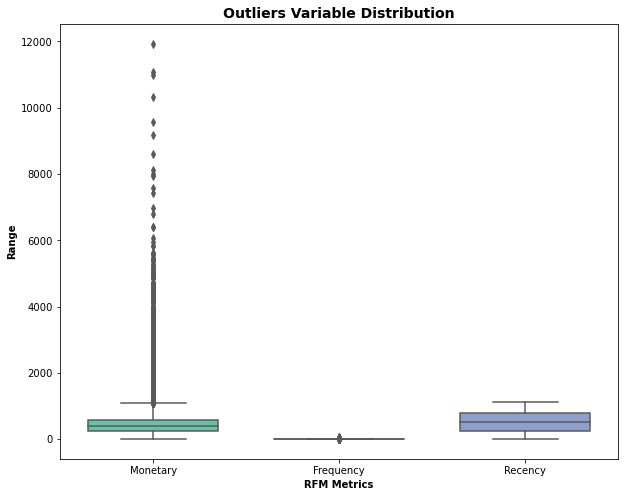

In [29]:
# Outlier Analysis
rfm_metrics = ['Monetary','Frequency','Recency']
sns.boxplot(data = RFM_df[rfm_metrics], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("RFM Metrics", fontweight = 'bold')
plt.show()

- `Monetary` value distribution is very skewed due to the presence of outliers with high monetary value.

#### Further investigate `Monetary` outliers

In [14]:
# Calculate the first and third quartiles and the interquartile range for the Monetary column
Q1 = RFM_df['Monetary'].quantile(0.25)
Q3 = RFM_df['Monetary'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

monetary_upper_df = RFM_df[RFM_df['Monetary'] > upper_bound]
monetary_upper_df.shape

(3574, 4)

In [30]:
upper_bound

1111.25

In [16]:
monetary_upper_df.describe()

,ID,Recency,Frequency,Monetary
count,3574.000000,3574.000000,3574.000000,3574.000000
mean,41673.226077,442.096251,1.298265,1738.146556
std,22682.975590,288.614373,2.028764,832.965969
min,31.000000,1.000000,1.000000,1111.500000
25%,22849.000000,168.000000,1.000000,1245.740000
50%,38523.500000,437.000000,1.000000,1466.950000
75%,63933.750000,642.000000,1.000000,1916.675000
max,83546.000000,1104.000000,66.000000,11930.660000


## Remove outliers
Remove outliers based on Monetary value
Outliers are identified as those fall below the first quartile (Q1) minus 1.5 times the interquartile range (IQR) or above the third quartile (Q3) plus 1.5 times the IQR.  
IQR is difference between Q3 and Q1

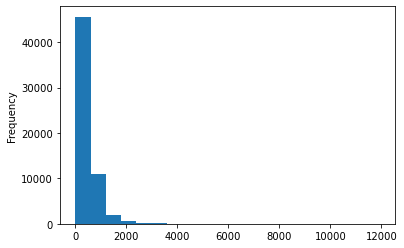

In [15]:
# Show skewed Mone
RFM_df['Monetary'].plot.hist(bins=20)
plt.show()

In [16]:
# Calculate the first and third quartiles and the interquartile range for the Monetary column
Q1 = RFM_df['Monetary'].quantile(0.25)
Q3 = RFM_df['Monetary'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

monetary_upper_df = RFM_df[RFM_df['Monetary'] > upper_bound]

In [17]:
monetary_upper_df['Frequency'].describe()

count    3790.000000
mean        1.286016
std         1.973963
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        66.000000
Name: Frequency, dtype: float64

In [24]:
monetary_upper_df.shape

(3790, 4)

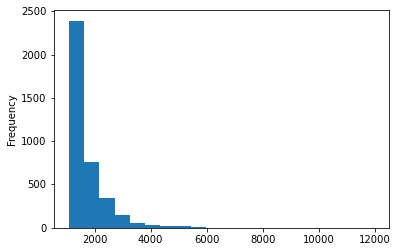

In [18]:
# check distribution of Monetary value for outliers
monetary_upper_df['Monetary'].plot.hist(bins=20)
plt.show()

- There is quite a large number of customers (within the outliers) with `Monetary` value up to around 3,000 dollars, which is still a reasonably high value.
- Hence, will raise the upper bound and widen the `Monetary` value range to include more customers within approximately 3,000 dollars rather than drop them as outliers.

In [19]:
upper_bound = Q3 + 7 * IQR
upper_bound

2942.0

In [20]:
RFM_df[RFM_df['Monetary']>upper_bound]['Frequency'].describe()

count    229.000000
mean       2.458515
std        6.036023
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       66.000000
Name: Frequency, dtype: float64

In [21]:
RFM_df.shape

(59593, 4)

In [22]:
# Identify and remove outliers from the Monetary column
total_outliers = len(RFM_df[(RFM_df['Monetary'] < lower_bound) | (RFM_df['Monetary'] > upper_bound)])
RFM_df = RFM_df[(RFM_df['Monetary'] >= lower_bound) & (RFM_df['Monetary'] <= upper_bound)]
print(f'After dropping {total_outliers} outliers, there are now {len(RFM_df)} customers.')

After dropping 229 outliers, there are now 59364 customers.


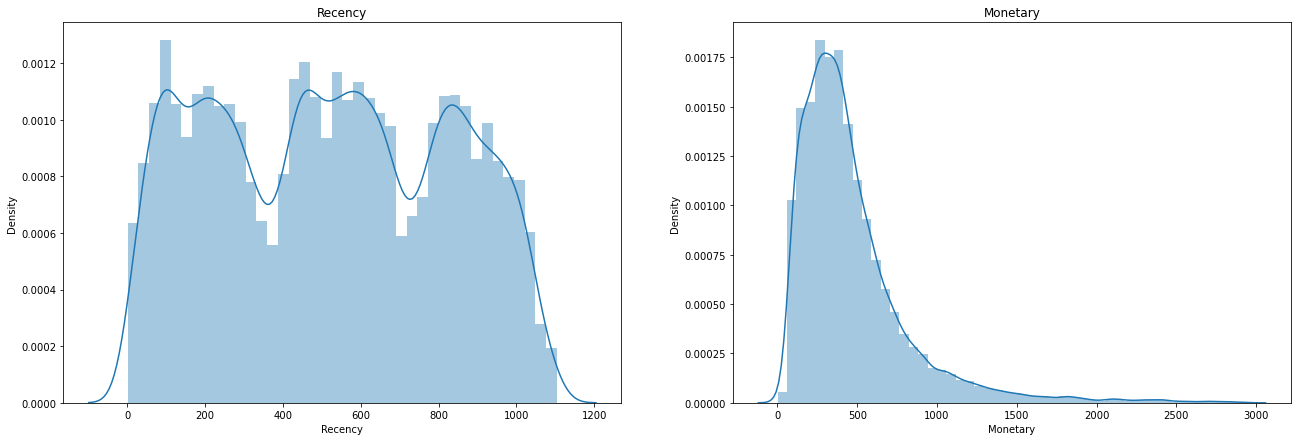

In [19]:
# check data distribution after dropping outliers
columns=["Recency","Monetary"]
plt.figure(figsize=(22,7))
for i,j in enumerate(columns):
    plt.subplot(1,2,i+1)
    sns.distplot(RFM_df[j])
    plt.title('{}'.format(j))

In [20]:
RFM_df.describe()

,ID,Recency,Frequency,Monetary
count,59364.000000,59364.000000,59364.000000,59364.000000
mean,36526.314433,519.648305,1.036622,469.409832
std,22829.699362,300.980185,0.475224,364.438834
min,1.000000,1.000000,1.000000,1.000000
25%,17717.750000,249.000000,1.000000,242.000000
50%,33425.500000,520.000000,1.000000,380.000000
75%,53779.500000,789.000000,1.000000,576.000000
max,83589.000000,1104.000000,57.000000,2938.000000


### Try Segmentation with K-means Clustering

#### Apply Log Transformation

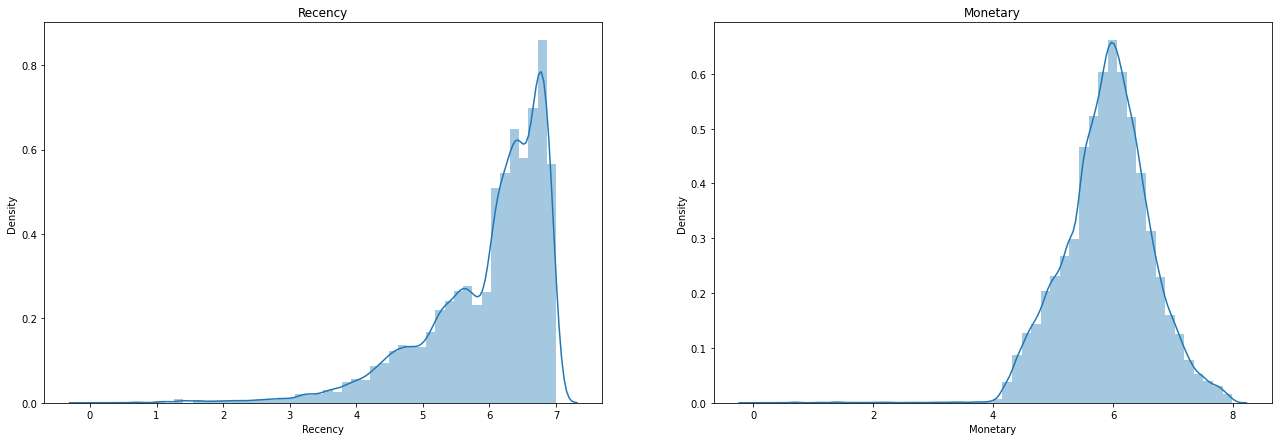

In [21]:
# create a separate df storing the log transformed metrics
rfm_log = RFM_df.copy()

# log transform Recency and Monetary
rfm_log = RFM_df[['Recency','Monetary']].apply(np.log, axis=1) 

# plot data distribution after log transformation
columns=['Recency','Monetary']
plt.figure(figsize=(22,7))
for i,j in enumerate(columns):
    plt.subplot(1,2,i+1)
    sns.distplot(rfm_log[j])
    plt.title('{}'.format(j))

### Standardise the data

In [22]:
scaler = StandardScaler()
scaled_rfm = scaler.fit_transform(rfm_log)

data_scaled=pd.DataFrame(scaled_rfm,columns=scaler.get_feature_names_out())

### Use Elbow Method to find the optimal number of clusters (K)

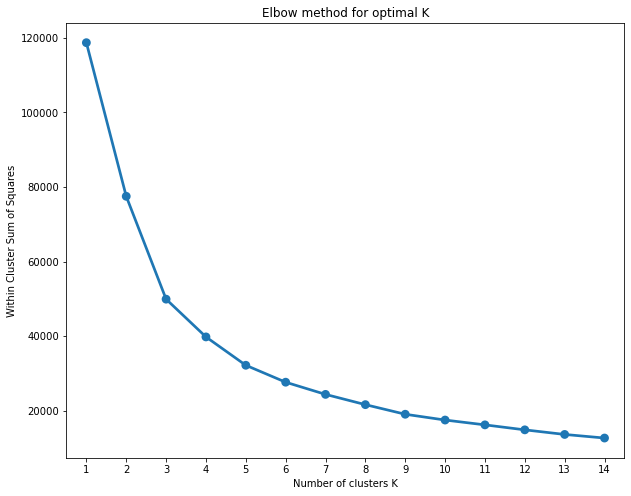

In [23]:
wcss={} #wcss stands for within cluster sum of squares

for k in range(1,15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000 , random_state=20)
    km = km.fit(data_scaled)
    wcss[k] = km.inertia_
    
#Plot graph for the wcss values and the number of clusters
plt.figure(figsize=(10,8))
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.xlabel('Number of clusters K')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow method for optimal K')
plt.show()

- Based on the Elbow Method, optimal K would be 4 as there is a less steep decrease in the within cluster sum of squares after 4.

In [24]:
#Build K Means clustering model using K=4
kmean_model = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=20)
kmean_model.fit(data_scaled)

#find the clusters for the customers
RFM_df['Segment'] = kmean_model.labels_ + 1 #start cluster naming from 1

RFM_df.head()

,ID,Recency,Frequency,Monetary,Segment
0,1,151,3,476.3,2
2,4,1100,1,300.0,4
4,6,1097,1,254.0,4
6,8,1100,1,629.0,4
8,10,1098,1,243.0,4


### Visualise the Kmeans Segments & Define Customer Profile in each Segment

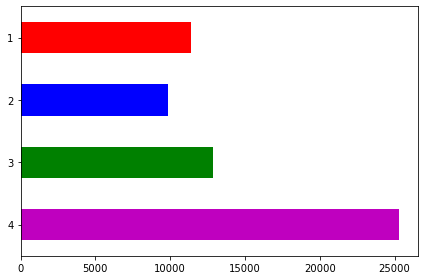

In [25]:
RFM_df['Segment'].value_counts().sort_index(ascending=False).plot(kind='barh',color=['m','g','b','r'])
plt.tight_layout()
plt.show()

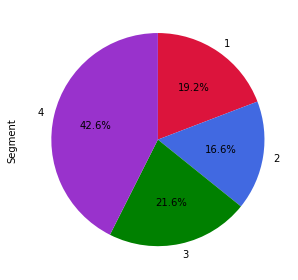

In [26]:
RFM_df['Segment'].value_counts().sort_index().plot(kind='pie',colors=['crimson','royalblue','green','darkorchid'],autopct='%1.1f%%',counterclock=False,startangle=90)
plt.tight_layout()
plt.show()

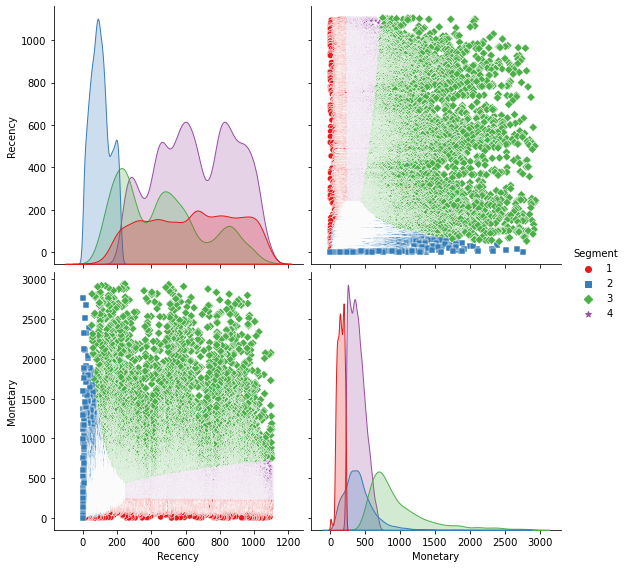

In [27]:
sns.pairplot(RFM_df[['Recency','Monetary','Segment']], hue="Segment", markers=["o", "s", "D","*"], 
             palette=sns.color_palette('Set1', n_colors=4),height=4)
plt.show()

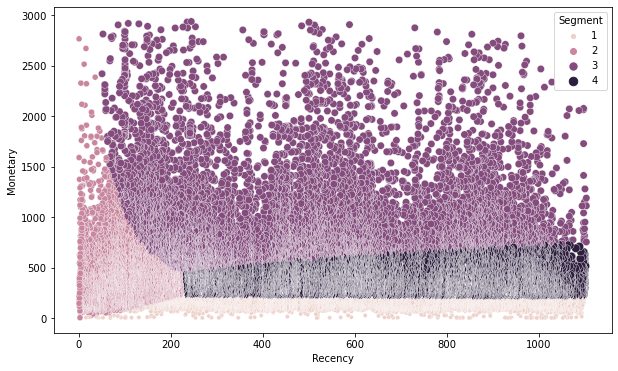

In [28]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the scatter plot for Recency and Monetary for four segments
sns.scatterplot(data=RFM_df, x='Recency', y='Monetary', hue='Segment', size='Segment')

# Show the figure
plt.show()

In [29]:
RFM_df[['Recency','Monetary']].describe()

,Recency,Monetary
count,59364.000000,59364.000000
mean,519.648305,469.409832
std,300.980185,364.438834
min,1.000000,1.000000
25%,249.000000,242.000000
50%,520.000000,380.000000
75%,789.000000,576.000000
max,1104.000000,2938.000000


In [30]:
RFM_df.groupby('Segment')[['Recency','Frequency','Monetary']].agg('mean')

,Recency,Frequency,Monetary
Segment,,,
1,633.394541,1.011586,147.319484
2,101.485584,1.060812,408.108359
3,458.161012,1.084358,964.937787
4,662.622611,1.014206,386.542537


https://www.putler.com/rfm-analysis/#Analyzing_RFM_customer_segments_with_RFM_model

https://clevertap.com/blog/rfm-analysis/

https://www.optimove.com/resources/learning-center/rfm-segmentation 

- Cluster 1: High recency and low monetary value -> "Hibernating" -> last transaction was long time ago and did not spend much -> offer special discounts and other relevant packages to recreate brand value
- Cluster 2: Low recency and moderate monetary value -> "Potential loyalists" -> recent customers & spent a decent amount -> build relationships with them by providing special offers & offer membership/loyalty programme
- Cluster 3: Moderate recency and high monetary value -> "Can't lose them" -> spent the most but have not returned for a long time -> win them back by sending personalised emails/campaigns/special offers that are tailored to their specific preferences to reconnect and encourage another stay / conduct surveys to find out if anything went wrong with their experience and avoid losing them to a competitor
- Cluster 4: High recency and moderate value -> "At risk" -> spent decent money but long time ago -> send personalised emails/reach out campaign to reconnect & revive interest to encourage another stay

### Classification Model

In [31]:
# Join RFM_df and df based on ID column
segmented_df = pd.merge(RFM_df[['ID', 'Segment']], df, on='ID', how='inner')
segmented_df = segmented_df.loc[:, ~segmented_df.columns.str.contains('^Unnamed')]
segmented_df = segmented_df.drop(['NameHash', 'DocIDHash'], axis=1)
nationality_enconder = LabelEncoder()
segmented_df['Nationality'] = nationality_enconder.fit_transform(segmented_df['Nationality'])

# Show the joined dataframe
segmented_df.head()

,ID,Segment,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,TotalRevenue
0,1,2,129,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,1,0,0,0,0,476.3
1,4,4,55,60.0,1095,93,240.0,60.0,0,0,...,0,1,0,0,0,0,0,0,1,300.0
2,6,4,82,54.0,1095,58,230.0,24.0,0,0,...,0,1,0,0,0,0,0,1,0,254.0
3,8,4,55,32.0,1095,38,535.0,94.0,0,0,...,0,1,0,0,0,0,0,1,0,629.0
4,10,4,73,25.0,1095,96,174.0,69.0,0,0,...,0,1,0,0,0,0,0,0,1,243.0


In [32]:
X = segmented_df.drop('Segment', axis=1).values
y = segmented_df['Segment'].values
le = LabelEncoder()
y = le.fit_transform(y) # encode class labels into numeric values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train a classifier
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train)

# Test the classifier on the testing data
y_pred = clf.predict(X_test) 

# Evaluate the classifier performance
acc = accuracy_score(y_test, y_pred) # calculate accuracy
cm = confusion_matrix(y_test, y_pred) # calculate confusion matrix
cr = classification_report(y_test, y_pred) # generate classification report

print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {cm}')
print(f'Classification report:\n {cr}')

Accuracy: 0.9951991914427694
Confusion matrix:
 [[2288   13    0    3]
 [   5 1969    4    0]
 [   0   10 2526   10]
 [   3    0    9 5033]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2304
           1       0.99      1.00      0.99      1978
           2       0.99      0.99      0.99      2546
           3       1.00      1.00      1.00      5045

    accuracy                           1.00     11873
   macro avg       0.99      0.99      0.99     11873
weighted avg       1.00      1.00      1.00     11873



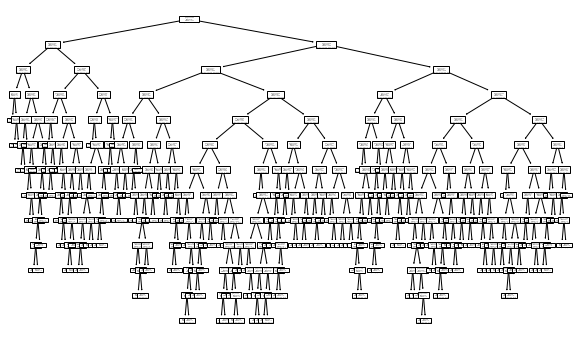

In [33]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the decision tree with feature names
plot_tree(clf)

# Show the figure
plt.show()